## 3. 自动售货机画像

### 主要任务

**任务3.1** 分析各售货机商品销售数据，总结规律，给出每台售货机**各类**商品标签

**任务3.2** 根据商品标签生成售货机完整画像

In [1]:
# 加载模块
from datetime import datetime
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import wordcloud
# 指定画图默认字体
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# 打开各数据 csv 文件
task1_1A = open(r'..\数据预处理\各售货机销售信息\task1-1A.csv')
task1_1B = open(r'..\数据预处理\各售货机销售信息\task1-1B.csv')
task1_1C = open(r'..\数据预处理\各售货机销售信息\task1-1C.csv')
task1_1D = open(r'..\数据预处理\各售货机销售信息\task1-1D.csv')
task1_1E = open(r'..\数据预处理\各售货机销售信息\task1-1E.csv')
table_all =  open(r'..\数据预处理\各售货机销售信息\销售数据总表(带标签).csv')
class_table =  open(r'..\自动售货机画像\标签数据\商品特征及分类信息.csv')

# 加载数据
sales_A = pd.read_csv(task1_1A, parse_dates = ['支付时间'])    # 售货机 A 交易数据
sales_B = pd.read_csv(task1_1B, parse_dates = ['支付时间'])    # 售货机 B 交易数据
sales_C = pd.read_csv(task1_1C, parse_dates = ['支付时间'])    # 售货机 C 交易数据
sales_D = pd.read_csv(task1_1D, parse_dates = ['支付时间'])    # 售货机 D 交易数据
sales_E = pd.read_csv(task1_1E, parse_dates = ['支付时间'])    # 售货机 E 交易数据
class_info = pd.read_csv(class_table) 
sales_all = pd.read_csv(table_all, parse_dates = ['支付时间']) # 所有售货机交易数据，用于任务2.1、2.4# 所有售货机交易数据，用于任务2.1、2.4

# 关闭文件
task1_1A.close()
task1_1B.close()
task1_1C.close()
task1_1D.close()
task1_1E.close()
class_table.close()
table_all.close()

### 3.1 分析各售货机商品销售数据，总结规律，给出每台售货机**各类**商品标签

### 3.1.1 获取所有售货机月均销量信息

In [2]:
# 计算月均销量
def Monthly_sales(data,m_number=1):
    '''
    data: 销售数据
    m_number: 数据中包含的售货机个数
    '''
    _infos = data.groupby(by='商品').size() # 各商品销量汇总
    sort_infos = _infos.sort_values(ascending=False) # 商品销量从高到低
    m_sort_infos = sort_infos.values/(12*m_number) #计算平均每台售货机各商品 月均销量
    r_infos = pd.DataFrame({'商品':sort_infos.index,'月均销量': m_sort_infos.round(2)}) # 结果信息
    return r_infos


In [3]:
# 五台售货机平均每台售货机月均销量信息
all_infos = Monthly_sales(sales_all,5)
all_infos.head(5)

商品   月均销量
0  怡宝纯净水  82.73
1     脉动  46.30
2   东鹏特饮  43.02
3  阿萨姆奶茶  39.93
4   营养快线  37.32

In [4]:
# A 售货机平均每台售货机月均销量信息
A_infos = Monthly_sales(sales_A)
A_infos.head(5)

商品   月均销量
0        怡宝纯净水  44.25
1         东鹏特饮  37.33
2        阿萨姆奶茶  27.17
3           脉动  25.75
4  30g无穷农场盐_鸡蛋  22.00

In [5]:
# B 售货机平均每台售货机月均销量信息
B_infos = Monthly_sales(sales_B)
B_infos.head(5)

商品    月均销量
0  怡宝纯净水  111.83
1   东鹏特饮   40.67
2  阿萨姆奶茶   38.08
3     脉动   35.92
4   营养快线   35.42

In [6]:
# C 售货机平均每台售货机月均销量信息
C_infos = Monthly_sales(sales_C)
C_infos.head(5)

商品   月均销量
0  怡宝纯净水  83.25
1     脉动  63.25
2   东鹏特饮  43.75
3  阿萨姆奶茶  38.00
4   营养快线  36.25

In [7]:
# D 售货机平均每台售货机月均销量信息
D_infos = Monthly_sales(sales_D)
D_infos.head(5)

商品   月均销量
0   东鹏特饮  34.25
1  怡宝纯净水  32.25
2  阿萨姆奶茶  30.42
3   营养快线  26.58
4  统一冰红茶  25.75

In [8]:
# E 售货机平均每台售货机月均销量信息
E_infos = Monthly_sales(sales_E)
E_infos.head(5)

商品    月均销量
0  怡宝纯净水  142.08
1     脉动   83.00
2   营养快线   67.08
3  阿萨姆奶茶   66.00
4   东鹏特饮   59.08

### 3.1.2 观察总表数据分布并确定标签划分指标

In [9]:
# 将数据按月均销量切分成 15 组，并统计每组包含数据的数量
sections = np.linspace(0,all_infos['月均销量'][0],16).round(2)
group_names = [str(sections[i])+"～"+str(sections[i+1]) for i in range(15)]
cuts = pd.cut(all_infos['月均销量'].values,sections,labels=group_names)

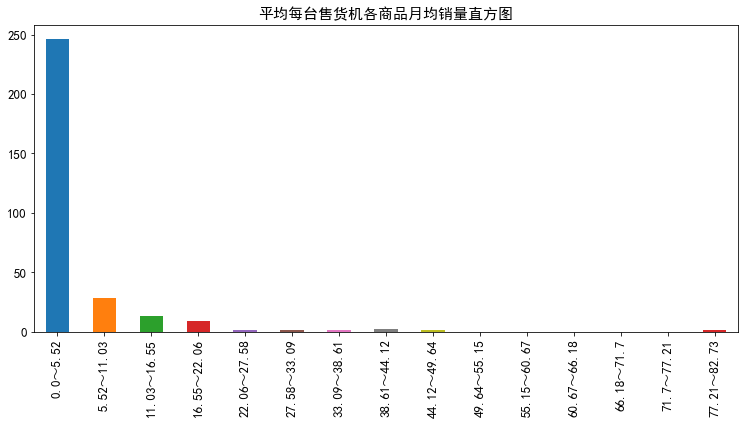

In [10]:
# 绘制“平均每台售货机各商品月均销量直方图”观察数据分布情况
cuts.value_counts().plot(kind='bar',fontsize=13,figsize =(10.5,6))
plt.title('平均每台售货机各商品月均销量直方图',fontsize=15)
plt.tight_layout()
plt.savefig(r'.\绘图结果\平均每台售货机各商品月均销量直方图.png')
plt.show()

**通过上图数据分布可设定以下划分标准：**

**滞销**：每台售货机各商品月均销量 **≤** 5.52

**正常**： 5.52 **＜** 每台售货机各商品月均销量 **≤** 27.58

**热销**： 每台售货机各商品月均销量 **＞** 27.58

### 3.1.3 根据划分标准为各商品添加标签

In [11]:
# 标签初始化
A_infos['标签'] = None
B_infos['标签'] = None
C_infos['标签'] = None
D_infos['标签'] = None
E_infos['标签'] = None

# 为 A 售货机添加标签
A_infos.loc[A_infos['月均销量'] <= 5.52, '标签'] = '滞销'
A_infos.loc[(A_infos['月均销量'] > 5.52) & (A_infos['月均销量'] <= 27.58), '标签'] = '正常'
A_infos.loc[A_infos['月均销量'] > 27.58 ,'标签'] = '热销'

# 为 B 售货机添加标签
B_infos.loc[B_infos['月均销量'] <= 5.52, '标签'] = '滞销'
B_infos.loc[(B_infos['月均销量'] > 5.52) & (B_infos['月均销量'] <= 27.58), '标签'] = '正常'
B_infos.loc[B_infos['月均销量'] > 27.58 ,'标签'] = '热销'

# 为 C 售货机添加标签
C_infos.loc[C_infos['月均销量'] <= 5.52, '标签'] = '滞销'
C_infos.loc[(C_infos['月均销量'] > 5.52) & (C_infos['月均销量'] <= 27.58), '标签'] = '正常'
C_infos.loc[C_infos['月均销量'] > 27.58 ,'标签'] = '热销'

# 为 D 售货机添加标签
D_infos.loc[D_infos['月均销量'] <= 5.52, '标签'] = '滞销'
D_infos.loc[(D_infos['月均销量'] > 5.52) & (D_infos['月均销量'] <= 27.58), '标签'] = '正常'
D_infos.loc[D_infos['月均销量'] > 27.58 ,'标签'] = '热销'

# 为 E 售货机添加标签
E_infos.loc[E_infos['月均销量'] <= 5.52, '标签'] = '滞销'
E_infos.loc[(E_infos['月均销量'] > 5.52) & (E_infos['月均销量'] <= 27.58), '标签'] = '正常'
E_infos.loc[E_infos['月均销量'] > 27.58 ,'标签'] = '热销'

E_infos.head(5) # 观察效果

商品    月均销量  标签
0  怡宝纯净水  142.08  热销
1     脉动   83.00  热销
2   营养快线   67.08  热销
3  阿萨姆奶茶   66.00  热销
4   东鹏特饮   59.08  热销

In [12]:
# 保存每台售货机各类商品标签
A_infos.loc[:, ['商品', '标签']].to_csv(r'.\标签数据\task3-1A.csv',index=None, encoding='gbk')
B_infos.loc[:, ['商品', '标签']].to_csv(r'.\标签数据\task3-1B.csv',index=None, encoding='gbk')
C_infos.loc[:, ['商品', '标签']].to_csv(r'.\标签数据\task3-1C.csv',index=None, encoding='gbk')
D_infos.loc[:, ['商品', '标签']].to_csv(r'.\标签数据\task3-1D.csv',index=None, encoding='gbk')
E_infos.loc[:, ['商品', '标签']].to_csv(r'.\标签数据\task3-1E.csv',index=None, encoding='gbk')

### 3.2 生成售货机完整画像

In [13]:
# 观察“商品特征及分类信息”中的信息
class_info.head(5)

商品              特征   大类       二级类
0       100g*5瓶益力多             益力多   饮料       乳制品
1  100g越南LIPO奶味面包干        越南面包干,奶味  非饮料      饼干糕点
2      10g卫龙亲嘴烧香辣味    卫龙亲嘴烧,香辣味,卫龙  非饮料  肉干/豆制品/蛋
3   10g越南LIPO奶味面包干        越南面包干,奶味  非饮料      饼干糕点
4       110g顺宝九制话梅  顺宝九制话梅,顺宝九制,话梅  非饮料     蜜饯/果干

### 3.2.1 构建各商品特征词典和二级类词典

In [14]:
#构建类别词典
list_feature = list(map(lambda x : (x[0], x[1].split(',')), class_info.values))
list_class = list(map(lambda x : (x[0], x[3]), class_info.values))
feature_dict = dict(list_feature)
class_dict = dict(list_class)

### 3.2.2 声明绘图所需函数

In [15]:
# 生成绘制特征词云图所需词列表
def feature_list(data):
    '''
    data: 售货机销售数据
    '''
    f_list = []
    result = list(map(lambda x : feature_dict[x], sales_A['商品'].values))
    for i in result:
        f_list += i
    return f_list

# 生成绘制二级类别词云图所需词列表
def class_list(data):
    '''
    data: 售货机销售数据
    '''
    c_list = list(map(lambda x : class_dict[x], sales_A['商品'].values))
   
    return c_list

# 绘制词云图
def draw_wordcloud(word_list,mask):
    '''
    word_list: 词列表
    mask: 掩码图
    '''
    word_counts = collections.Counter(word_list) # 对列表做词频统计
    wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
    background_color='white',
    mask=mask, # 设置背景图
    max_words=100, # 最多显示词数
    max_font_size=100 # 字体最大值
    )
    wc.generate_from_frequencies(word_counts)# 从字典生成词云
    
    return wc

### 3.2.3 绘制售货机A的画像

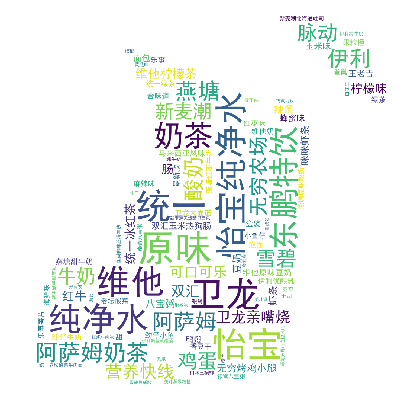

In [16]:
#A售货机特征词云

feature_A = feature_list(sales_A) # A 特征词列表
mask = np.array(Image.open(r'.\mask\a.jpg'))
wc_A1 = draw_wordcloud(feature_A,mask) #A售货机特征词云
wc_A1.to_file(r'.\绘图结果\task3-2A_1.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_A1) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

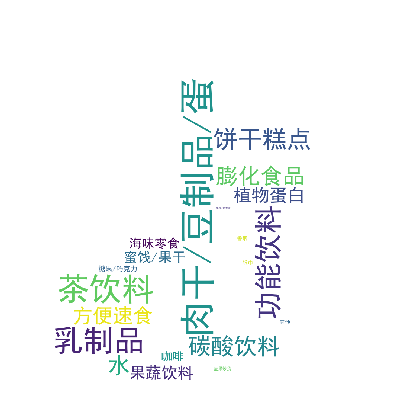

In [17]:
# A售货机类别词云

class_A = class_list(sales_A) # A 类别词列表
wc_A2 = draw_wordcloud(class_A,mask) # A售货机类别词云
wc_A2.to_file(r'.\绘图结果\task3-2A_2.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_A2) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

### 3.2.4 绘制售货机B的画像

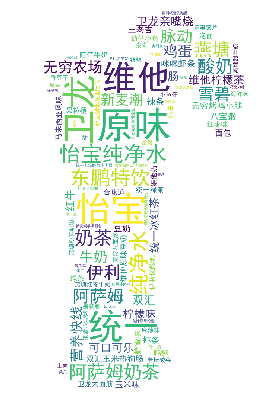

In [18]:
# B售货机特征词云

feature_B = feature_list(sales_B) # B 特征词列表
mask = np.array(Image.open(r'.\mask\b.jpg'))
wc_B1 = draw_wordcloud(feature_B,mask) # B售货机特征词云
wc_B1.to_file(r'.\绘图结果\task3-2B_1.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_B1) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

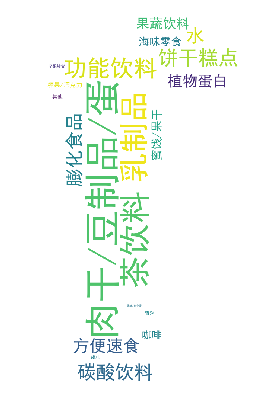

In [19]:
# B售货机类别词云

class_B = class_list(sales_B) # B 类别词列表
wc_B2 = draw_wordcloud(class_B,mask) # B售货机类别词云
wc_B2.to_file(r'.\绘图结果\task3-2B_2.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_B2) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

### 3.2.5 绘制售货机C的画像

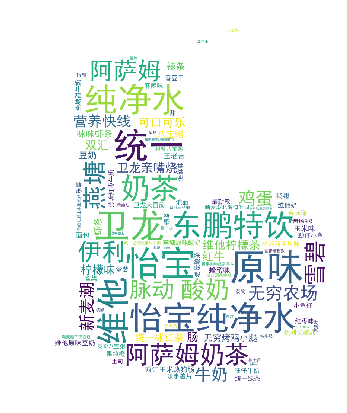

In [20]:
# C售货机特征词云

feature_C = feature_list(sales_C) # C 特征词列表
mask = np.array(Image.open(r'.\mask\c.jpg'))
wc_C1 = draw_wordcloud(feature_C,mask) # C 售货机特征词云
wc_C1.to_file(r'.\绘图结果\task3-2C_1.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_C1) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

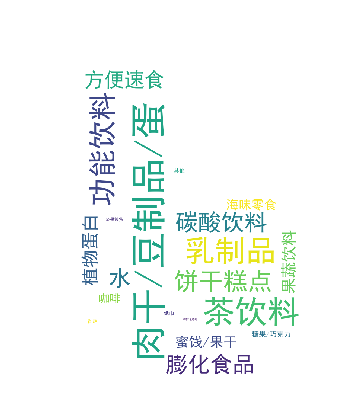

In [21]:
# C售货机类别词云

class_C = class_list(sales_C) # C 类别词列表
wc_C2 = draw_wordcloud(class_C,mask) # C售货机类别词云
wc_C2.to_file(r'.\绘图结果\task3-2C_2.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_C2) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

### 3.2.6 绘制售货机D的画像

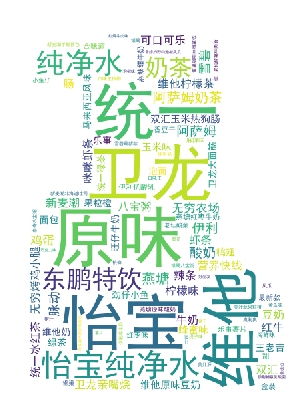

In [22]:
# D售货机特征词云

feature_D = feature_list(sales_D) # D 特征词列表
mask = np.array(Image.open(r'.\mask\d.jpg'))
wc_D1 = draw_wordcloud(feature_D,mask) # D 售货机特征词云
wc_D1.to_file(r'.\绘图结果\task3-2D_1.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_D1) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

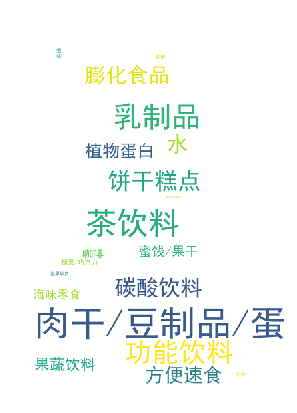

In [23]:
# D售货机类别词云

class_D = class_list(sales_D) # D 类别词列表
wc_D2 = draw_wordcloud(class_D,mask) # D售货机类别词云
wc_D2.to_file(r'.\绘图结果\task3-2D_2.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_D2) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

### 3.2.7 绘制售货机E的画像

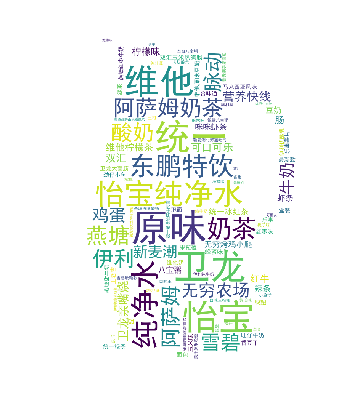

In [24]:
# E售货机特征词云

feature_E = feature_list(sales_E) # E 特征词列表
mask = np.array(Image.open(r'.\mask\e.jpg'))
wc_E1 = draw_wordcloud(feature_E,mask) # E 售货机特征词云
wc_E1.to_file(r'.\绘图结果\task3-2E_1.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_E1) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

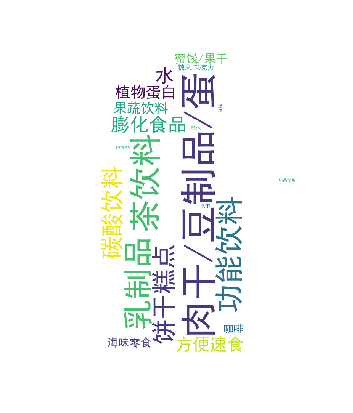

In [25]:
# E售货机类别词云

class_E = class_list(sales_E) # E 类别词列表
wc_E2 = draw_wordcloud(class_E,mask) # E售货机类别词云
wc_E2.to_file(r'.\绘图结果\task3-2E_2.png')
plt.figure(figsize=(7,7))
plt.imshow(wc_E2) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像